In [1]:
# Importing needed packages
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
import time

In [2]:
#Getting data
df =pd.read_csv('five_sec')
df.head()

,dataset_5secondWindow.csv,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,0.0,16170.0,78.0,NaN,100.0,9.811476,9.758895,9.849411,0.014626,0.029340,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
1,1.0,15871.0,145.0,NaN,100.0,9.939207,7.707437,17.146631,1.775944,0.999925,...,89.200210,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,0.628595,Car,U12
2,2.0,16811.0,150.0,NaN,100.0,9.827178,9.804817,9.849262,0.011199,0.665215,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
3,3.0,15831.0,105.0,NaN,77.0,9.673039,7.659674,12.304298,0.862553,0.996221,...,87.470377,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,0.628595,Car,U12
4,4.0,876.0,77.0,NaN,100.0,9.993466,8.965621,10.891645,0.504117,0.563792,...,89.770732,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,NaN,Car,U1


In [3]:
df.head()

,dataset_5secondWindow.csv,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,0.0,16170.0,78.0,NaN,100.0,9.811476,9.758895,9.849411,0.014626,0.029340,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
1,1.0,15871.0,145.0,NaN,100.0,9.939207,7.707437,17.146631,1.775944,0.999925,...,89.200210,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,0.628595,Car,U12
2,2.0,16811.0,150.0,NaN,100.0,9.827178,9.804817,9.849262,0.011199,0.665215,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
3,3.0,15831.0,105.0,NaN,77.0,9.673039,7.659674,12.304298,0.862553,0.996221,...,87.470377,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,0.628595,Car,U12
4,4.0,876.0,77.0,NaN,100.0,9.993466,8.965621,10.891645,0.504117,0.563792,...,89.770732,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,NaN,Car,U1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5894 entries, 0 to 5893
Data columns (total 71 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   dataset_5secondWindow.csv                        5893 non-null   float64
 1   id                                               5893 non-null   float64
 2   time                                             5893 non-null   float64
 3   activityrecognition#0                            0 non-null      float64
 4   activityrecognition#1                            5893 non-null   float64
 5   android.sensor.accelerometer#mean                5893 non-null   float64
 6   android.sensor.accelerometer#min                 5893 non-null   float64
 7   android.sensor.accelerometer#max                 5893 non-null   float64
 8   android.sensor.accelerometer#std                 5893 non-null   float64
 9   android.sensor.game_rotation_v

In [5]:
#counting nan in the data
df.isnull().sum().sort_values(ascending=False).head(30)

activityrecognition#0                              5894
android.sensor.step_counter#std                    5662
android.sensor.proximity#std                       5611
android.sensor.proximity#max                       4775
android.sensor.proximity#min                       4775
android.sensor.proximity#mean                      4775
android.sensor.pressure#std                        4766
speed#std                                          4576
android.sensor.step_counter#min                    4407
android.sensor.step_counter#max                    4407
android.sensor.step_counter#mean                   4407
android.sensor.pressure#max                        3976
android.sensor.pressure#min                        3976
android.sensor.pressure#mean                       3976
android.sensor.light#std                           3770
speed#min                                          2374
speed#mean                                         2374
speed#max                                       

In [6]:
#Dropping the columns with more than 1000 Nans
df = df.drop(['dataset_5secondWindow.csv', 'id','activityrecognition#0','user'], axis=1)
#,'android.sensor.step_counter#std','android.sensor.proximity#std','android.sensor.proximity#max','android.sensor.proximity#min','android.sensor.proximity#mean','android.sensor.pressure#std','speed#std','android.sensor.step_counter#min','android.sensor.step_counter#max','android.sensor.step_counter#mean','android.sensor.pressure#max','android.sensor.pressure#min','android.sensor.pressure#mean','android.sensor.light#std','speed#min','speed#mean','speed#max','sound#std','android.sensor.light#max','android.sensor.light#mean','android.sensor.light#min',

In [7]:
#recounting
print(df.isnull().sum().sort_values(ascending=False).head(30))
print(df.shape)

android.sensor.step_counter#std                   5662
android.sensor.proximity#std                      5611
android.sensor.proximity#mean                     4775
android.sensor.proximity#max                      4775
android.sensor.proximity#min                      4775
android.sensor.pressure#std                       4766
speed#std                                         4576
android.sensor.step_counter#max                   4407
android.sensor.step_counter#mean                  4407
android.sensor.step_counter#min                   4407
android.sensor.pressure#max                       3976
android.sensor.pressure#min                       3976
android.sensor.pressure#mean                      3976
android.sensor.light#std                          3770
speed#min                                         2374
speed#mean                                        2374
speed#max                                         2374
sound#std                                         1832
android.se

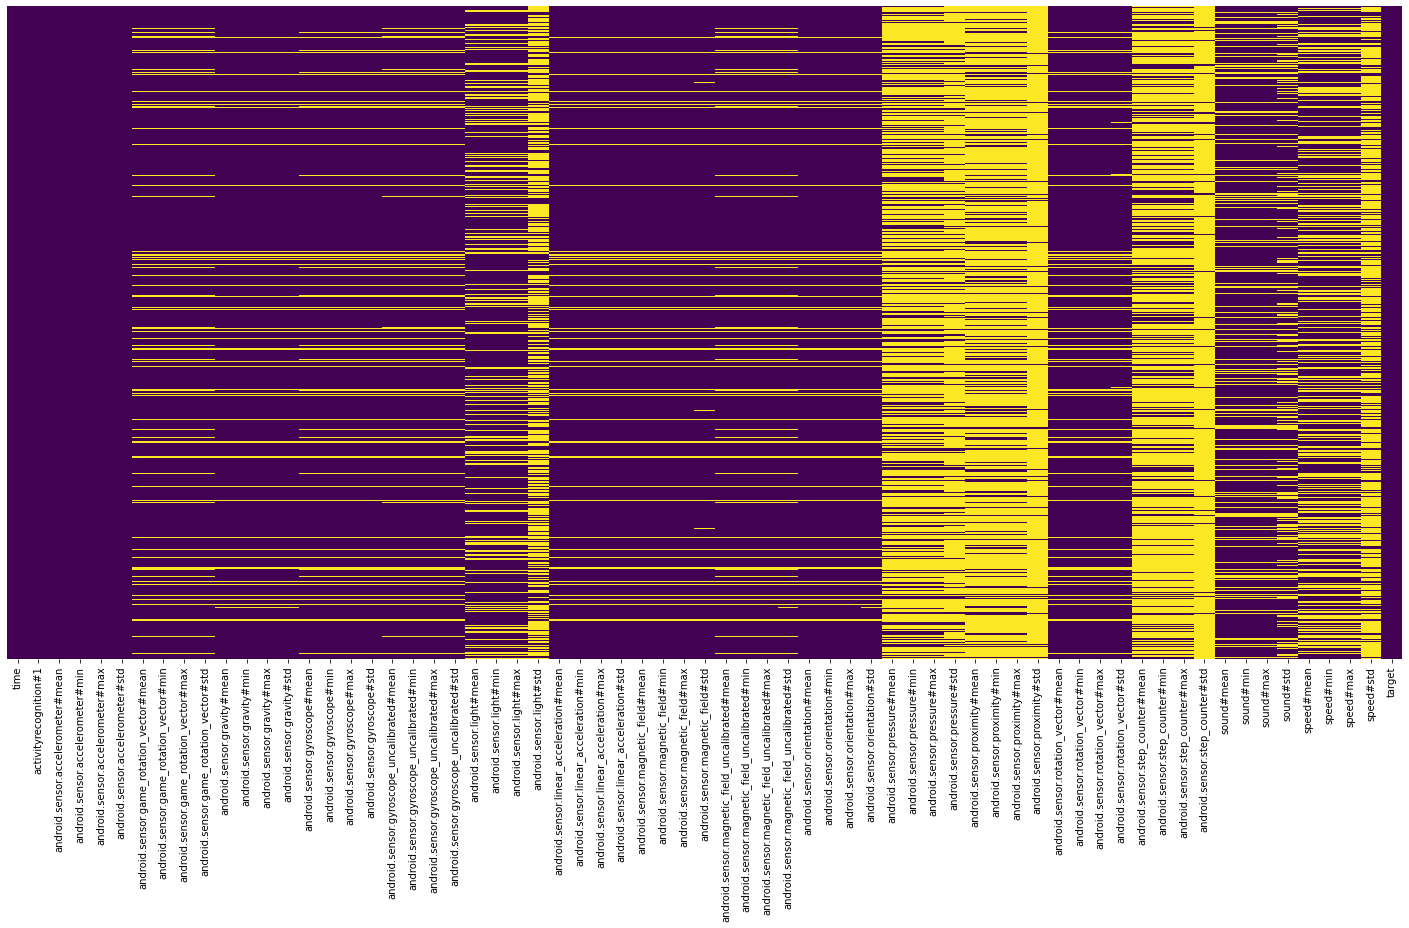

In [8]:
#plotting nan values --> yellow is nan
plt.figure(figsize=(25, 12))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')
plt.show()

In [9]:
df = df.dropna(how='all')

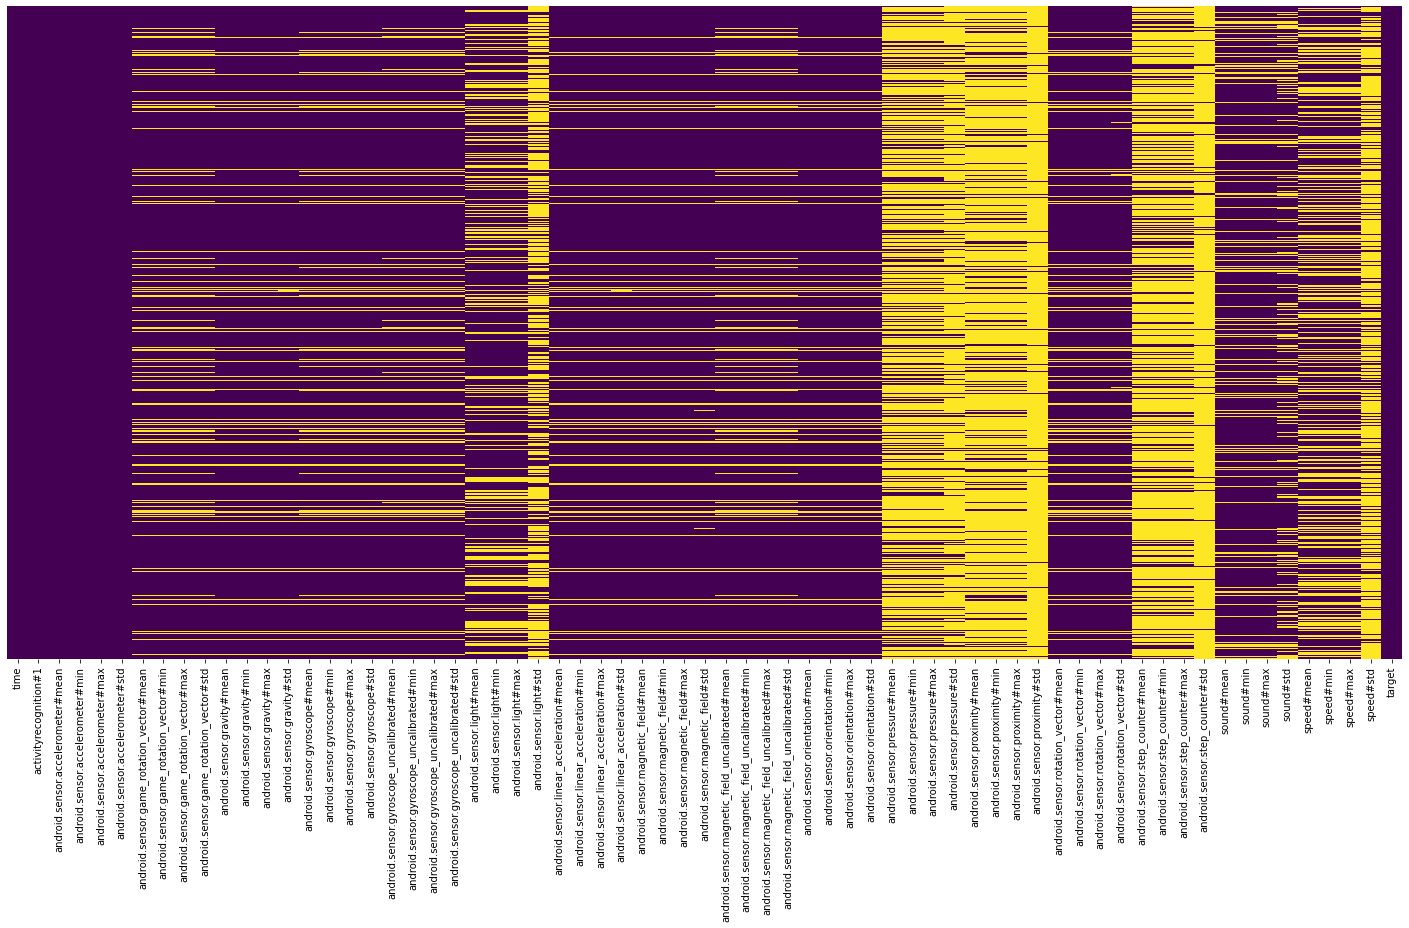

In [10]:
#plotting nan values --> yellow is nan
plt.figure(figsize=(25, 12))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')
plt.show()

In [11]:
df.shape

(5893, 67)

In [12]:
df['target'].isnull().sum()

0

In [13]:
#filling nan with 0
df = df.fillna(0)

In [14]:
#rechecking nans
df.isnull().sum().sort_values(ascending=False).head()

time                                              0
android.sensor.rotation_vector#mean               0
android.sensor.magnetic_field_uncalibrated#max    0
android.sensor.magnetic_field_uncalibrated#std    0
android.sensor.orientation#mean                   0
dtype: int64

In [15]:
oe = OrdinalEncoder()
cd = asarray(df['target'])
df['target'] = oe.fit_transform(cd.reshape(-1,1))

In [16]:
#Splitting the data into train and test
X,y = df.drop(['target'], axis=1), df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
tree_classifiers= {
  "Decision Tree": DecisionTreeClassifier(),
  "Random Forest": RandomForestClassifier(),
  "Extra Trees":ExtraTreesClassifier()
  }

In [19]:
results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

for model_name, model in tree_classifiers.items():
    
    start_time = time.time()
    model.fit(X_train, y_train)
    total_time = time.time() - start_time
        
    pred = model.predict(X_test)
    
    results = results.append({"Model":    model_name,
                              "Accuracy": accuracy_score(y_test, pred)*100,
                              "Bal Acc.": balanced_accuracy_score(y_test, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              
results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='Blues')

C:\Users\Abubakr\AppData\Local\Temp\ipykernel_4620\3920733270.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\Abubakr\AppData\Local\Temp\ipykernel_4620\3920733270.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\Abubakr\AppData\Local\Temp\ipykernel_4620\3920733270.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,


,Model,Accuracy,Bal Acc.,Time
1,Extra Trees,98.981900,98.984428,0.491684
2,Random Forest,98.529412,98.536732,1.580436
3,Decision Tree,93.495475,93.486728,0.215421
